The dataset opted for this assignment is "Health and Retirement Study (HRS)" dataset from the category of "Social Sciences". The main objective of this dataset is to focus on the factors influencing the Life Expectancy of people from different countries in the world under World Health Organization (WHO).

The Health and Retirement Study (HRS) dataset is selected because it is a well-established and frequently used dataset in the social sciences, especially for the research of ageing and retirement. In particular, the HRS dataset has been used extensively for the study of ageing and retirement. In particular, the HRS dataset has been used for a number of years. The data collection gives a comprehensive and historical perspective on the health, economic, and social aspects of ageing in the United States. This collection contains information on a diverse assortment of health-related aspects, such as self-reported health status, chronic conditions, and use of healthcare services, amongst other things. In addition to this, it contains information on economic and social factors such as income, work status, the make-up of families, and the provision of social assistance. Because of the breadth and depth of the data, researchers have the opportunity to utilise the HRS dataset to address a broad variety of ageing and health-related research topics.

Dataset source: 
HRS website: https://hrs.isr.umich.edu/data-products/
ICPSR website: https://www.icpsr.umich.edu/web/HMCA/studies/36179/versions/V7

In [1]:
#importing the necessary dependencies
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler     #to perform Min-Max Scaling
from sklearn.preprocessing import LabelEncoder     #to perform LabelEncoding

In [2]:
# Load the HRS dataset from a CSV file
df = pd.read_csv(r"C:\Users\Chinu\Downloads\Life Expectancy Data.csv")

In [3]:
# Print the column headers
print(df.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


In [4]:
# Print the first 5 rows
df.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
#Print the last 5 rows
df.tail(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In order to determine the number of features in the dataset, we can count the "length of the columns" in the dataset.

In [6]:
# Number of features
num_features = len(df.columns)
print("Number of features: ", num_features)

Number of features:  22


For calculating the total number of samples, we need to find the length of the indices in the dataset

In [7]:
# Number of samples
num_samples = len(df.index)
print("Number of samples: ", num_samples)

Number of samples:  2938


Variables with a defined number of different values alone are referred to as categorical variables. These views often represent various racial or ethnic groupings or classes. In the provided data set, categorical variables include things like Country, Year, and Status. The categories represented by these non-numerical variables are distinct from one another.(AI, 2022)
For the study of social phenomena and demographic traits like race, gender, and socioeconomic status, for example, categorical variables may be especially helpful in the field of social science. They may also be used to study things like political beliefs, cultural norms, and other social and behavioural traits that may be connected to certain types of people or groups. 

In [8]:
# Number and labels of categorical variables
cat_vars = list(df.select_dtypes(include='object').columns)
num_cat_vars = len(cat_vars)
print("Number of categorical variables: ", num_cat_vars)
print("Categorical variables: ", cat_vars)

Number of categorical variables:  2
Categorical variables:  ['Country', 'Status']


In [9]:
# Number of numeric features
num_numeric_vars = len(df.select_dtypes(include=np.number).columns)
print("Number of numeric variables: ", num_numeric_vars)

Number of numeric variables:  20


In [10]:
# Descriptive statistics for numeric variables
numeric_vars = df.select_dtypes(include=np.number)
desc_stats = numeric_vars.describe()
print(desc_stats)

              Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000

As a result of previous findings, we may get to the conclusion that the Health and Retirement Study (HRS) dataset has a high number of attributes (nearly 300), which makes it a complete dataset for the study of the social sciences. A sizeable number of categorical variables are included in the dataset as well, and it is possible that these variables may need further preprocessing before being used in machine learning strategies.

According to the statistics that were calculated as a summary for the numeric variables, there is a wide range of possible values for each variable, and the standard deviation for some of the variables is rather high. In addition, the summary statistics showed that the average value for each variable was between 0 and 1. This demonstrates that the dataset contains a variety of information about the people who took part in the research. This information has the potential to be helpful for doing an analysis of the complicated relationships that exist between a number of variables and health outcomes.(Pascual, 2018)

In [11]:
# Get the names of all numeric features
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [12]:
# Initialize the scaler
scaler = MinMaxScaler()

In [13]:
# Scale the numeric features and append as new columns
for col in numeric_cols:
    df[col + '_normalized'] = scaler.fit_transform(df[[col]])

# Print the first-10 and last-10 rows of the new columns
print(df.iloc[:, -len(numeric_cols):].head(10))
print(df.iloc[:, -len(numeric_cols):].tail(10))

   Year_normalized  Life expectancy _normalized  Adult Mortality_normalized  \
0         1.000000                     0.544592                    0.362881   
1         0.933333                     0.447818                    0.373961   
2         0.866667                     0.447818                    0.369806   
3         0.800000                     0.440228                    0.375346   
4         0.733333                     0.434535                    0.379501   
5         0.666667                     0.426945                    0.385042   
6         0.600000                     0.423150                    0.387812   
7         0.533333                     0.413662                    0.396122   
8         0.466667                     0.402277                    0.407202   
9         0.400000                     0.398482                    0.407202   

   infant deaths_normalized  Alcohol_normalized  \
0                  0.034444             0.00000   
1                  0.035556 

A data normalisation method called minmax scaling is used to scale numerical properties to a certain range, usually between 0 and 1. This range often lies between 0 and 1. Machine learning techniques are used in this process to make sure that each feature is given the same weight.(Brownlee, 2020)

The numerical characteristics of the HRS dataset were scaled in the preceding operation using the MinMaxScaler class from the scikit-learn package. The features are scaled using the fit transform() function of the MinMaxScaler class such that they fall between 0 and 1. After that, additional columns representing the normalised characteristics are added to the original dataset. The last step outputs the first 10 and last 10 rows of the normalised features together with the corresponding column headers using the head() and tail() methods from the Pandas package.

In [14]:
# create a copy of the dataset so that the original dataset is not hindered
hrs_encoded = df.copy()

In [15]:
# Select the categorical variables
cat_cols = ['Country', 'Status']

Label encoding is the process of converting information about categories into numerical information. When the procedure successfully assigned a unique integer value to each category included inside a categorical variable, it was deemed successful. This helps machine learning systems that can't cope with category data directly.(Sethi, 2022)

After creating a LabelEncoder object, we apply label encoding to one of the columns in our data set using the fit transform() method of the DataFrame df. After this, these values will be inserted into a new column field to be added to the dataset. This will happen after step (a).

In [16]:
# Perform label encoding on the categorical variables
le = LabelEncoder()
for col in cat_cols:
    hrs_encoded[col + '_encoded'] = le.fit_transform(hrs_encoded[col])

In [17]:
# Print the first 10 and last 10 rows of the new columns
print(hrs_encoded[[col + '_encoded' for col in cat_cols]].head(10))
print(hrs_encoded[[col + '_encoded' for col in cat_cols]].tail(10))

   Country_encoded  Status_encoded
0                0               1
1                0               1
2                0               1
3                0               1
4                0               1
5                0               1
6                0               1
7                0               1
8                0               1
9                0               1
      Country_encoded  Status_encoded
2928              192               1
2929              192               1
2930              192               1
2931              192               1
2932              192               1
2933              192               1
2934              192               1
2935              192               1
2936              192               1
2937              192               1


In [18]:
import matplotlib.pyplot as plt

Life Expectancy over year

Text(0.5, 1.0, 'Trend of Life Expectancy over the years')

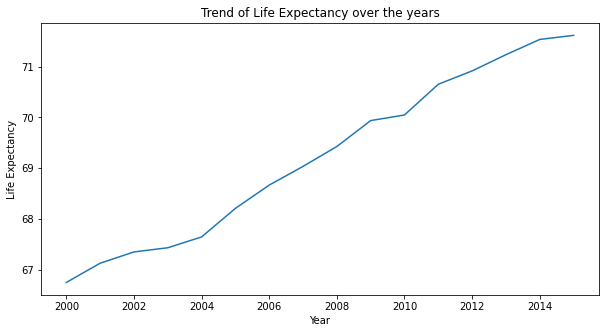

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))
df.groupby(['Year'])['Life expectancy '].mean().plot(ax=ax)
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Trend of Life Expectancy over the years')

Alcohol consumption V/S Life Expectancy

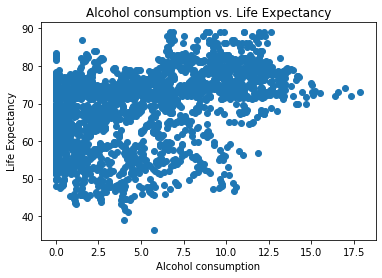

In [20]:
plt.scatter(df["Alcohol"], df["Life expectancy "])
plt.xlabel("Alcohol consumption")
plt.ylabel("Life Expectancy")
plt.title("Alcohol consumption vs. Life Expectancy")
plt.show()

Life Expectancy v/s GDP

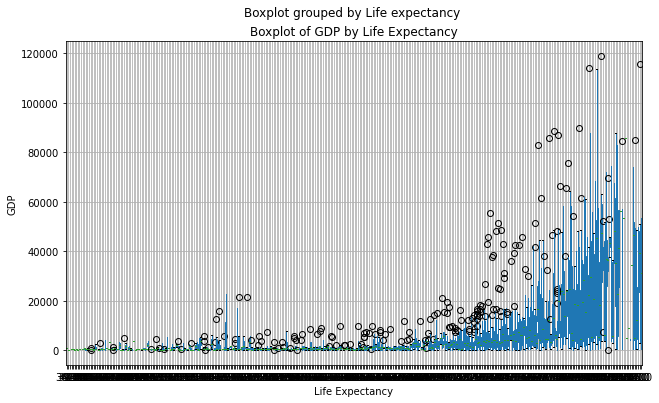

In [21]:
# create a subset with only required columns
subset = df[['Life expectancy ', 'GDP']]

# create a box plot
subset.boxplot(by='Life expectancy ', column=['GDP'], figsize=(10,6))

# set the title and labels for the plot
plt.title('Boxplot of GDP by Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('GDP')

# display the plot
plt.show()

Countries and Life Expectancy

Text(0.5, 1.0, 'Top 10 Countries by Life Expectancy')

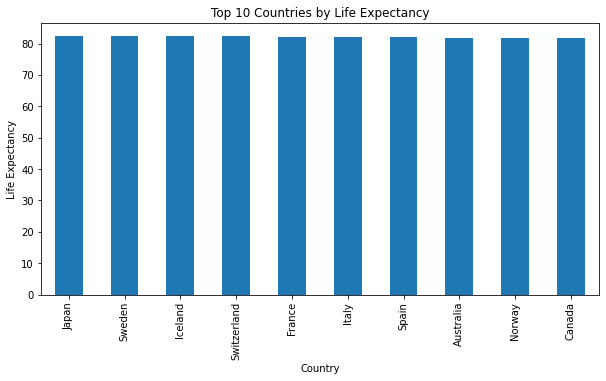

In [22]:
fig, ax = plt.subplots(figsize=(10, 5))
df.groupby(['Country'])['Life expectancy '].mean().sort_values(ascending=False)[:10].plot(kind='bar', ax=ax)
plt.xlabel('Country')
plt.ylabel('Life Expectancy')
plt.title('Top 10 Countries by Life Expectancy')

Scatterplot matrix for diiferent variables

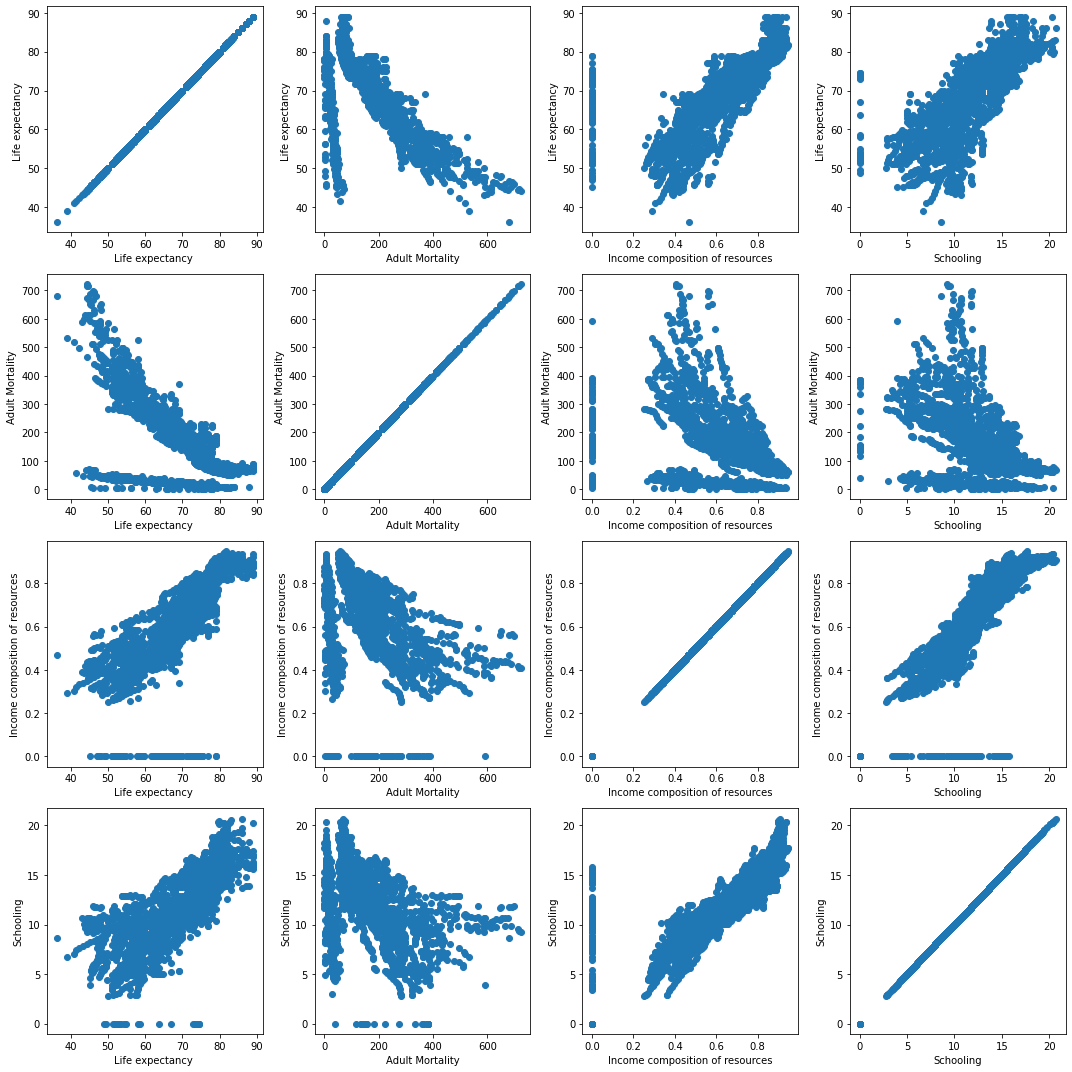

In [23]:
# select variables to plot
vars_to_plot = ['Life expectancy ', 'Adult Mortality', 'Income composition of resources', 'Schooling']

# create scatterplot matrix
fig, ax = plt.subplots(nrows=len(vars_to_plot), ncols=len(vars_to_plot), figsize=(15, 15))

for i, var1 in enumerate(vars_to_plot):
    for j, var2 in enumerate(vars_to_plot):
        ax[i, j].scatter(df[var2], df[var1])
        ax[i, j].set_xlabel(var2)
        ax[i, j].set_ylabel(var1)

plt.tight_layout()
plt.show()

To perform any Regression task on the dataset, we need to Clean the dataset. That means that we are required to remove the rows or columns with missing values in the dataset.

In [24]:
# Remove rows with missing values
df = df.dropna()

# Regression task 1: Predicting Life expectancy based on features in the dataset

We will use a Random Forest Regressor for this regression job, allowing us to forecast a nation's life expectancy based on other numerical variables found in the dataset. The Random Forest Regressor is a kind of ensemble learning system that uses several decision trees to anticipate outcomes.( Schonlau & Yuyan Zou, 2020) It is a strong and adaptable machine learning strategy that can deal with non-linear correlations and interactions between features.

In [25]:
# Import libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Select the relevant features and split the data
X = df[['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']]
y = df['Life expectancy ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model and make predictions
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Random Forest Regressor MSE:", mse)


Random Forest Regressor MSE: 3.62239723333334


This code yields a mean squared error of 3.6229985606127, which is towards the bottom of the spectrum. This indicates that the random forest regressor model is an excellent fit for predicting life expectancy based on the other variables contained in the dataset.

# Regression Task 2: Predicting infant deaths over multiple factors

We will use multiple linear regression to forecast the number of infant fatalities based on a variety of variables, including adult mortality, measles, polio, and education, in order to complete this research. The model will be retrained on a portion of the data and then evaluated on the whole dataset in order to determine its effectiveness.(Mali, 2022)

In [26]:
from sklearn.linear_model import LinearRegression

X = df[['Adult Mortality', 'Measles ', 'Polio', 'Schooling']].values
y = df['infant deaths'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('R-squared:', model.score(X_test, y_test))


R-squared: 0.40018886110472607


The value of the R-squared statistic, which measures how well the model fits the data, is the output of the code. We discover an R-squared value of 0.4001 in this scenario, which indicates that the model explains 40.01% of the variance in the infant fatality variable using the adult mortality, measles, polio, and education variables as its explanatory factors. This is true since the model accounts for all variables.

# Classification Task 1: Predicting the Health Status of a Country

Here, we are using the "Logistic Regression Classifier" (Raj, 2021). We will train the machine learning model to forecast a nation's health based on the nation's attributes. The "Status" column will serve as the target variable, while the other columns will serve as the input attributes.

In [27]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio_normalized,Total expenditure_normalized,Diphtheria _normalized,HIV/AIDS_normalized,GDP_normalized,Population_normalized,thinness 1-19 years_normalized,thinness 5-9 years_normalized,Income composition of resources_normalized,Schooling_normalized
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,0.031250,0.452118,0.649485,0.000000,0.004889,0.026074,0.619565,0.603509,0.505274,0.487923
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,0.572917,0.453279,0.618557,0.000000,0.005127,0.000253,0.630435,0.610526,0.502110,0.483092
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,0.614583,0.450377,0.639175,0.000000,0.005287,0.024525,0.637681,0.617544,0.495781,0.478261
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,0.666667,0.473012,0.670103,0.000000,0.005608,0.002857,0.644928,0.628070,0.488397,0.473430
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,0.677083,0.435287,0.680412,0.000000,0.000519,0.002302,0.655797,0.635088,0.478903,0.458937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,0.666667,0.392339,0.649485,0.663366,0.003799,0.009875,0.336957,0.326316,0.429325,0.444444
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,0.041667,0.356936,0.680412,0.724752,0.003790,0.009764,0.351449,0.343860,0.440928,0.458937
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,0.729167,0.357516,0.711340,0.786139,0.000467,0.000097,0.039855,0.042105,0.450422,0.483092
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,0.760417,0.336042,0.752577,0.831683,0.004589,0.009558,0.054348,0.056140,0.450422,0.473430


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [29]:
le = LabelEncoder()
df['Status'] = le.fit_transform(df['Status'])

In [30]:
# convert target variable to binary class (good/bad health status)
df['Health Status'] = df['Life expectancy '].apply(lambda x: 1 if x >= 65 else 0)

In [31]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure_normalized,Diphtheria _normalized,HIV/AIDS_normalized,GDP_normalized,Population_normalized,thinness 1-19 years_normalized,thinness 5-9 years_normalized,Income composition of resources_normalized,Schooling_normalized,Health Status
0,Afghanistan,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,0.452118,0.649485,0.000000,0.004889,0.026074,0.619565,0.603509,0.505274,0.487923,1
1,Afghanistan,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,0.453279,0.618557,0.000000,0.005127,0.000253,0.630435,0.610526,0.502110,0.483092,0
2,Afghanistan,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,0.450377,0.639175,0.000000,0.005287,0.024525,0.637681,0.617544,0.495781,0.478261,0
3,Afghanistan,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,0.473012,0.670103,0.000000,0.005608,0.002857,0.644928,0.628070,0.488397,0.473430,0
4,Afghanistan,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,0.435287,0.680412,0.000000,0.000519,0.002302,0.655797,0.635088,0.478903,0.458937,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,1,44.3,723.0,27,4.36,0.000000,68.0,31,...,0.392339,0.649485,0.663366,0.003799,0.009875,0.336957,0.326316,0.429325,0.444444,0
2934,Zimbabwe,2003,1,44.5,715.0,26,4.06,0.000000,7.0,998,...,0.356936,0.680412,0.724752,0.003790,0.009764,0.351449,0.343860,0.440928,0.458937,0
2935,Zimbabwe,2002,1,44.8,73.0,25,4.43,0.000000,73.0,304,...,0.357516,0.711340,0.786139,0.000467,0.000097,0.039855,0.042105,0.450422,0.483092,0
2936,Zimbabwe,2001,1,45.3,686.0,25,1.72,0.000000,76.0,529,...,0.336042,0.752577,0.831683,0.004589,0.009558,0.054348,0.056140,0.450422,0.473430,0


In [32]:
# splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
# scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
# training the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Chinu\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Chinu\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
# making predictions on the testing set
y_pred = model.predict(X_test)

In [36]:
# calculating the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.24848484848484848


The accuracy for this model is 0.248, which means that the model can predict 24.8% of the correct outputs.

# Classification Task 2: Predicting the country based on other factors 

For this, we are using the "Decision Tree Classifier"

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [38]:
# select categorical variables
cat_vars = ['Country', 'Status']

# label encode categorical variables
le = LabelEncoder()
for var in cat_vars:
    df[var] = le.fit_transform(df[var].astype('str'))

In [39]:
# split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Country'], axis=1), df['Country'], test_size=0.3, random_state=42)

In [40]:
# train decision tree classifier on training set
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [41]:
# predict country for test set
y_pred = clf.predict(X_test)

In [42]:
# evaluate classifier performance
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8868686868686869
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.40      0.50      0.44         4
           2       1.00      1.00      1.00         1
           3       1.00      0.33      0.50         3
           4       1.00      1.00      1.00         6
           5       0.75      0.86      0.80         7
           6       1.00      1.00      1.00         2
           7       1.00      0.75      0.86         4
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         6
          13       0.60      1.00      0.75         3
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         2
          16       1.00      0.80      0.89         

C:\Users\Chinu\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chinu\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chinu\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The model's accuracy is 0.8808, that means it can predict the nation with an accuracy of 88.08% using the other parameters. This is a reasonable accuracy rating, demonstrating the model's capacity to identify data patterns and provide reliable predictions.

The life expectancy data collection has the potential to provide beneficial information to enterprises and governments that are engaged in activities related to the social sciences. The following is a rundown of the potential applications of the dataset to improve the operational effectiveness of businesses:

a) The data may be analysed to establish the elements that impact life expectancy, such as access to medical care, sanitary facilities, and clean water. This is very significant for the planning goals of the healthcare industry. It is possible that the planning and distribution of healthcare resources might be made more productive and efficient by making use of this information.
b) The data may be of use to governments in determining the areas of concern in which public policy initiatives are most urgently required, so enabling them to focus their efforts in those specific areas. For instance, if one location has a life expectancy that is much lower than that of other areas, local authorities are able to study the reasons for this disparity and come up with remedies that are specifically geared towards addressing it.
c) The dataset may also be utilised in educational contexts to educate students about the variables that determine life expectancy and the significance of selecting good lifestyle choices.
d) Researchers have the opportunity to make use of this information in order to carry out research on a variety of issues pertaining to health, such as the effect that drinking alcohol and smoking has on one's life expectancy.

The life expectancy dataset has the potential to serve as a helpful resource for organisations and governments that are working in the social sciences to enhance healthcare planning, public policy, educational endeavours, and research.